In [1]:
import plot_functions
import sys
import os
sys.path.append("..")
from get_data import get_data
from copy import deepcopy


In [2]:
def analysis_complete(analysis_path, sql_table_path, show, name_running, attributes, count_repost):
    cur = get_data.get_cursor(analysis_path=analysis_path, sql_table_path=sql_table_path)
    get_data.pivot_raw_table(cur, attributes)
    data = get_data.select_pivoted_table(cur)
    cur.execute('DROP TABLE pivoted_table')
    responses_progress = plot_functions.responses_progress(data, count_repost=count_repost)
    return responses_progress    

In [3]:
name_simulation = 'simulation_tutorial'
analysis_path = os.path.join('..', 'soil_output', name_simulation)
sql_table_path = f'{name_simulation}_trial_0.sqlite'
show = True
name_running = 'prueba'
attributes = ['cause', 'method', 'response', 'stance', 'repost']
count_repost = True

In [4]:
acumulada = analysis_complete(analysis_path, sql_table_path, show, name_running, attributes, count_repost)

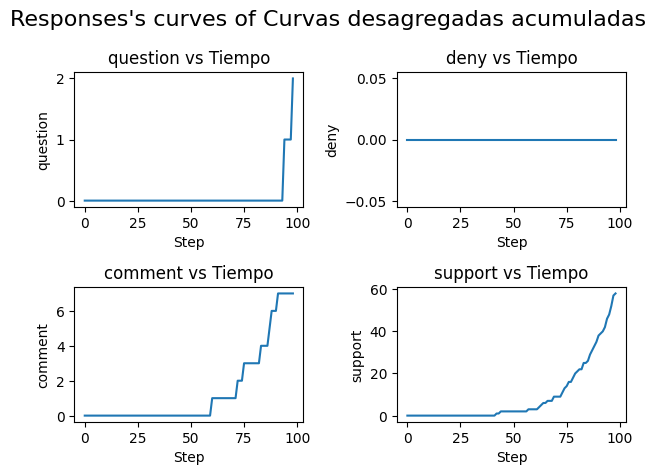

In [5]:
plot_functions.plot_responses(responses_progress=acumulada, show=show, name_running='Curvas desagregadas acumuladas')

In [6]:
puntual = deepcopy(acumulada)

In [7]:
for index in range(len(puntual[1:])):
    for key in puntual[index+1]:
        try:
            # print(f"Asigno a i={index+1},key={key}: {acumulada[index+1][key]}-{acumulada[index][key]}")
            puntual[index+1][key] = acumulada[index+1][key] - acumulada[index][key]
        except Exception as exc:
            print(exc, f"indice: {index}")
    # print(f"indice {index}", puntual[index])
    

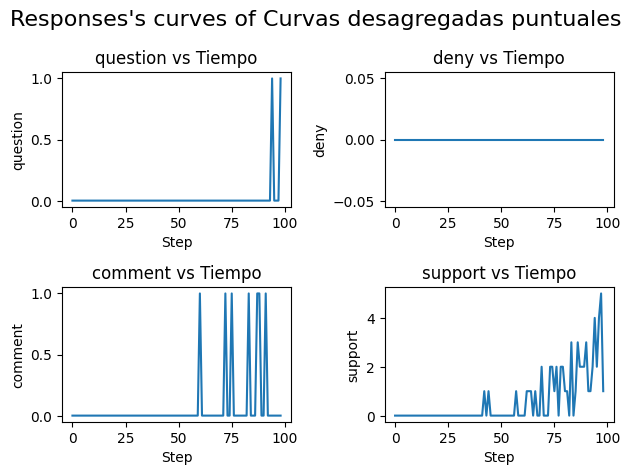

In [8]:
plot_functions.plot_responses(responses_progress=puntual, show=show, name_running='Curvas desagregadas puntuales')

In [9]:
acumulada_agregado = list(map(lambda x: x['question']+x['deny']+x['comment']+x['support'], acumulada))

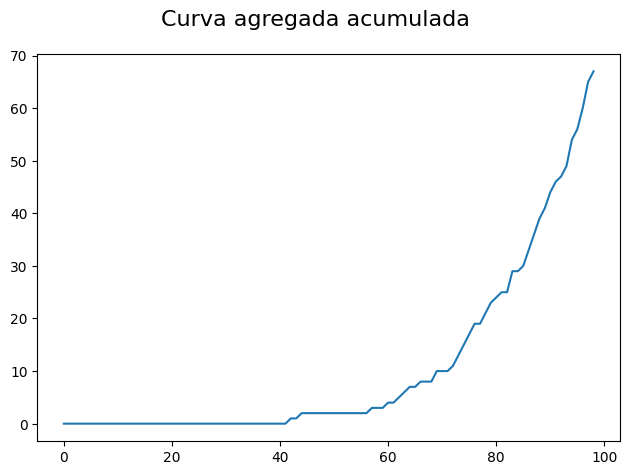

In [10]:
plot_functions.plot_curve(acumulada_agregado, show=True, name_running='Curva agregada acumulada')


In [11]:
agregado_puntual = acumulada_agregado.copy()

In [12]:
if len(acumulada_agregado) > 0:
    for index, value in enumerate(acumulada_agregado[1:]):
        try:
            agregado_puntual[index+1] = acumulada_agregado[index+1] - acumulada_agregado[index]
        except Exception as exc:
            print(exc, f"indice: {index}")

In [13]:
agregado_puntual2 = list(map(lambda x: x['question']+x['deny']+x['comment']+x['support'], puntual))
# Es lo mismo que agregado_puntual, obtenido de otra forma. Lo hice para verificar

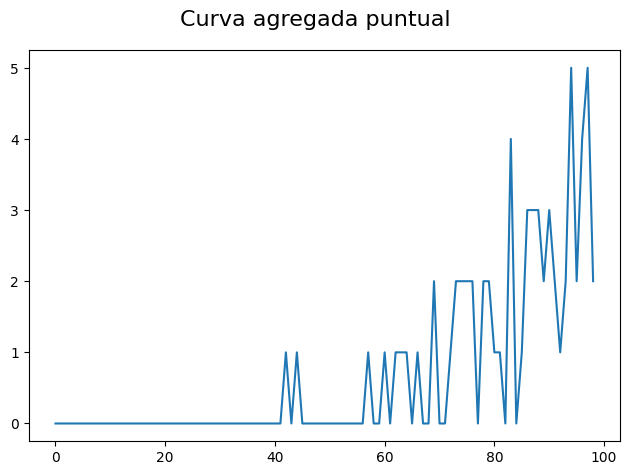

In [14]:
plot_functions.plot_curve(agregado_puntual, show=True, name_running='Curva agregada puntual')
